In [29]:
#import modules
# https://www.datacamp.com/tutorial/discovering-hidden-topics-python
import os.path
import nltk
from gensim import corpora
from gensim.models import LsiModel
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from gensim.models.coherencemodel import CoherenceModel
import matplotlib.pyplot as plt


In [31]:
# one observation
'''Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during 
the pre-financial crisis boom years. So it is tempting to think the bank, when asked by 
US Department of Justice to pay a large bill for polluting the financial system with 
mortgage junk between 2005 and 2007, should cough up, apologise and learn some humility.
 That is not the view of the chief executive, Jes Staley. 
 Barclays thinks the DoJâ€™s claims are â€œdisconnected from the factsâ€ 
 and that it has â€œan obligation to our shareholders, customers, clients and employees 
 to defend ourselves against unreasonable allegations and demands.â€ 
 The stance is possibly foolhardy, since going into open legal battle with 
 the most powerful US prosecutor is risky, especially if you end up losing. 
 But actually, some grudging respect for Staley and Barclays is in order. 
 The US system for dishing out fines to errant banks for their mortgage 
 sins has come to resemble a casino. The approach prefers settlements behind 
 closed doors and the difference in size of penalties is never explained. 
 Occasional leaks of the negotiating demands make the methodology appear even 
 more arbitrary. Deutsche Bank was initially asked for $14bn (Â£11.5bn), 
 but reached a settlement of $7.2bn on Thursday. Where is the rhyme or reason? 
 There is also a strong suspicion that the roulette wheel is weighted against the Europeans. 
 US banks, in the forms of JP Morgan, Goldman Sachs, Morgan Stanley, Bank of America and Citi, 
 were at the front of the queue for settlement for no obvious reason. If Barclays created 
 and distributed far fewer toxic mortgage securities than its US rivals, which is what the 
 bank argues, why shouldnâ€™t its fine be proportionately smaller? Neither Barclays nor the 
 DoJ is talking hard numbers. But Barclays, it is said, was asked for $4bn, versus its own 
 analysis that a fair sum would be $1bn and $2bn could have been swallowed for the sake of 
 certainty. When the gap is so wide, Barclays is entitled to take its chances in court â€“ 
 and yes, it probably has an obligation to do so. A board canâ€™t let $2bn slip out of the 
 door just for the sake of a quiet life. The case will be messy, inevitably. Barclaysâ€™ 
 practices were â€œplainly irresponsible and dishonest,â€ according to Loretta Lynch,
 the US attorney general. There is also a cache of ugly emails and documents. The DoJ 
 lawsuit says Barclays employees called one parcel of securitised loans â€œcraptacularâ€. 
 Another was said to â€œlook like shitâ€. However, that is almost par for the course in 
 these cases. The central question is the right size of penalty. If Barclays thinks it has 
 been singled out for unduly harsh treatment, the bank should try to prove its case. 
 Staley will look like a fool if he fails, but the willingness to reject the easy option 
 of settling is entirely legitimate.'''


"Barclays' defiance of US fines has merit Barclays disgraced itself in many ways during \nthe pre-financial crisis boom years. So it is tempting to think the bank, when asked by \nUS Department of Justice to pay a large bill for polluting the financial system with \nmortgage junk between 2005 and 2007, should cough up, apologise and learn some humility.\n That is not the view of the chief executive, Jes Staley. \n Barclays thinks the DoJâ€™s claims are â€œdisconnected from the factsâ€\x9d \n and that it has â€œan obligation to our shareholders, customers, clients and employees \n to defend ourselves against unreasonable allegations and demands.â€\x9d \n The stance is possibly foolhardy, since going into open legal battle with \n the most powerful US prosecutor is risky, especially if you end up losing. \n But actually, some grudging respect for Staley and Barclays is in order. \n The US system for dishing out fines to errant banks for their mortgage \n sins has come to resemble a casin

In [32]:
#download stopwords
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /Users/ma012/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [41]:
def load_data(path,file_name):
    """
    Input  : path and file_name
    Purpose: loading text file
    Output : list of paragraphs/documents and
             title(initial 100 words considred as title of document)
    """
    documents_list = []
    titles=[]
    with open( os.path.join(path, file_name) ,"r") as fin:
        for line in fin.readlines():
            text = line.strip()
            documents_list.append(text)
            titles.append( text[0:min(len(text),100)] )
    print("Total Number of Documents:",len(documents_list))
    return documents_list,titles

In [42]:
def preprocess_data(doc_set):
    """
    Input  : docuemnt list
    Purpose: preprocess text (tokenize, removing stopwords, and stemming)
    Output : preprocessed text
    """
    # initialize regex tokenizer
    tokenizer = RegexpTokenizer(r'\w+')
    # create English stop words list
    en_stop = set(stopwords.words('english'))
    # Create p_stemmer of class PorterStemmer
    p_stemmer = PorterStemmer()
    # list for tokenized documents in loop
    texts = []
    # loop through document list
    for i in doc_set:
        # clean and tokenize document string
        raw = i.lower()
        tokens = tokenizer.tokenize(raw)
        # remove stop words from tokens
        stopped_tokens = [i for i in tokens if not i in en_stop]
        # stem tokens
        stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
        # add tokens to list
        texts.append(stemmed_tokens)
    return texts


In [43]:
def prepare_corpus(doc_clean):
    """
    Input  : clean document
    Purpose: create term dictionary of our courpus and Converting list of documents (corpus) into Document Term Matrix
    Output : term dictionary and Document Term Matrix
    """
    # Creating the term dictionary of our courpus, where every unique term is assigned an index. dictionary = corpora.Dictionary(doc_clean)
    dictionary = corpora.Dictionary(doc_clean)
    # Converting list of documents (corpus) into Document Term Matrix using dictionary prepared above.
    doc_term_matrix = [dictionary.doc2bow(doc) for doc in doc_clean]
    # generate LDA model
    return dictionary,doc_term_matrix


In [44]:
def create_gensim_lsa_model(doc_clean,number_of_topics,words):
    """
    Input  : clean document, number of topics and number of words associated with each topic
    Purpose: create LSA model using gensim
    Output : return LSA model
    """
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    # generate LSA model
    lsamodel = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
    print(lsamodel.print_topics(num_topics=number_of_topics, num_words=words))
    return lsamodel


In [45]:
def compute_coherence_values(dictionary, doc_term_matrix, doc_clean, stop, start=2, step=3):
    """
    Input   : dictionary : Gensim dictionary
              corpus : Gensim corpus
              texts : List of input texts
              stop : Max num of topics
    purpose : Compute c_v coherence for various number of topics
    Output  : model_list : List of LSA topic models
              coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, stop, step):
        # generate LSA model
        model = LsiModel(doc_term_matrix, num_topics=number_of_topics, id2word = dictionary)  # train model
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=doc_clean, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())
    return model_list, coherence_values

Total Number of Documents: 4551


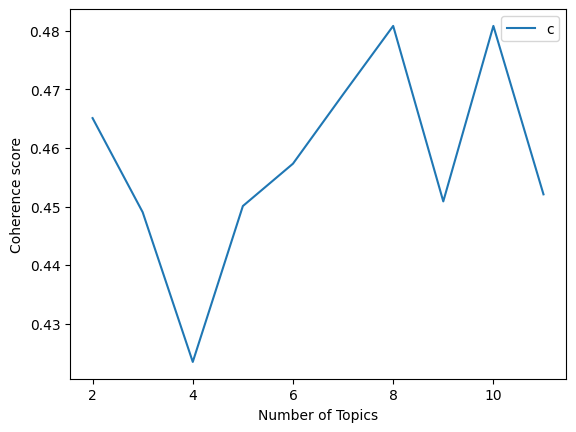

In [49]:
def plot_graph(doc_clean,start, stop, step):
    dictionary,doc_term_matrix=prepare_corpus(doc_clean)
    model_list, coherence_values = compute_coherence_values(dictionary, doc_term_matrix,doc_clean,
                                                            stop, start, step)
    # Show graph
    x = range(start, stop, step)
    plt.plot(x, coherence_values)
    plt.xlabel("Number of Topics")
    plt.ylabel("Coherence score")
    plt.legend(("coherence_values"), loc='best')
    plt.show()

document_list,titles=load_data("./data","LSASample.txt")
clean_text=preprocess_data(document_list)
start,stop,step=2,12,1
plot_graph(clean_text,start,stop,step)

In [50]:
# LSA Model
number_of_topics=8
words=10
model=create_gensim_lsa_model(clean_text,number_of_topics,words)


[(0, '0.869*"â" + 0.155*"trump" + 0.136*"say" + 0.118*"said" + 0.075*"would" + 0.071*"peopl" + 0.070*"clinton" + 0.070*"one" + 0.059*"year" + 0.059*"campaign"'), (1, '0.389*"citi" + 0.372*"v" + 0.358*"2016" + 0.358*"h" + 0.356*"2017" + 0.165*"unit" + 0.160*"west" + 0.157*"manchest" + 0.116*"apr" + 0.112*"dec"'), (2, '0.330*"eu" + -0.307*"trump" + 0.244*"say" + -0.222*"â" + 0.215*"would" + 0.173*"leav" + 0.147*"uk" + -0.136*"clinton" + 0.134*"said" + 0.132*"vote"'), (3, '-0.454*"trump" + 0.276*"min" + -0.202*"clinton" + 0.201*"â" + -0.181*"said" + -0.175*"campaign" + -0.172*"eu" + -0.139*"vote" + -0.132*"say" + 0.124*"goal"'), (4, '0.391*"min" + 0.386*"trump" + -0.279*"â" + 0.181*"clinton" + 0.172*"goal" + 0.144*"ball" + 0.120*"1" + 0.114*"0" + 0.102*"win" + 0.100*"leagu"'), (5, '0.433*"bank" + -0.263*"eu" + -0.240*"say" + -0.190*"min" + 0.183*"market" + 0.176*"year" + 0.165*"rate" + -0.143*"leav" + 0.127*"financi" + -0.123*"cameron"'), (6, '0.615*"say" + -0.225*"eu" + -0.179*"said" + -

In [54]:
model.print_topics()

[(0,
  '0.869*"â" + 0.155*"trump" + 0.136*"say" + 0.118*"said" + 0.075*"would" + 0.071*"peopl" + 0.070*"clinton" + 0.070*"one" + 0.059*"year" + 0.059*"campaign"'),
 (1,
  '0.389*"citi" + 0.372*"v" + 0.358*"2016" + 0.358*"h" + 0.356*"2017" + 0.165*"unit" + 0.160*"west" + 0.157*"manchest" + 0.116*"apr" + 0.112*"dec"'),
 (2,
  '0.330*"eu" + -0.307*"trump" + 0.244*"say" + -0.222*"â" + 0.215*"would" + 0.173*"leav" + 0.147*"uk" + -0.136*"clinton" + 0.134*"said" + 0.132*"vote"'),
 (3,
  '-0.454*"trump" + 0.276*"min" + -0.202*"clinton" + 0.201*"â" + -0.181*"said" + -0.175*"campaign" + -0.172*"eu" + -0.139*"vote" + -0.132*"say" + 0.124*"goal"'),
 (4,
  '0.391*"min" + 0.386*"trump" + -0.279*"â" + 0.181*"clinton" + 0.172*"goal" + 0.144*"ball" + 0.120*"1" + 0.114*"0" + 0.102*"win" + 0.100*"leagu"'),
 (5,
  '0.433*"bank" + -0.263*"eu" + -0.240*"say" + -0.190*"min" + 0.183*"market" + 0.176*"year" + 0.165*"rate" + -0.143*"leav" + 0.127*"financi" + -0.123*"cameron"'),
 (6,
  '0.615*"say" + -0.225*"eu"